In [1]:
# coding: utf-8
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import matplotlib.pyplot as plt

In [2]:
# Model structure
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 16),
            nn.Tanh(),
            nn.Linear(16, 2),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 16),
            nn.Tanh(),
            nn.Linear(16, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, inputs):
        codes = self.encoder(inputs)
        decoded = self.decoder(codes)

        return codes, decoded

In [3]:
# Load model
model = torch.load('autoencoder.pth')
model.eval()
print(model)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=16, bias=True)
    (5): Tanh()
    (6): Linear(in_features=16, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Tanh()
    (2): Linear(in_features=16, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


In [4]:
# DataLoader
test_set = torchvision.datasets.MNIST(
    root='mnist',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)
test_loader = data.DataLoader(test_set, batch_size=16, shuffle=False)

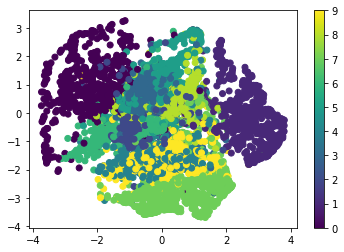

In [5]:
axis_x = []
axis_y = []
answers = []
with torch.no_grad():
    for data in test_loader:
        inputs = data[0].view(-1, 28*28)
        answers += data[1].tolist()

        code, outputs = model(inputs)
        axis_x += code[:, 0].tolist()
        axis_y += code[:, 1].tolist()


plt.scatter(axis_x, axis_y, c=answers)
plt.colorbar()
plt.show()